# Đọc file final_report.csv

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("final_report.csv")

df["order_date"] = pd.to_datetime(df["order_date"])

df["month"] = df["order_date"].dt.to_period("M").astype(str)

# 1.Pivot doanh thu theo category × tháng

In [19]:
df["revenue"] = df["quantity"] * df["unit_price"]

pivot_revenue = pd.pivot_table(
    df,
    values="revenue",
    index="category",
    columns="month",
    aggfunc="sum",
    fill_value=0
)

pivot_revenue

month,2024-01,2024-02,2024-03,2024-04
category,,,,
gia dụng,5400000.0,10100000.0,21250000.0,2950000.0
điện tử,18950000.0,20100000.0,11950000.0,8450000.0


Biểu đồ 1: Doanh thu theo loại sản phẩm theo tháng

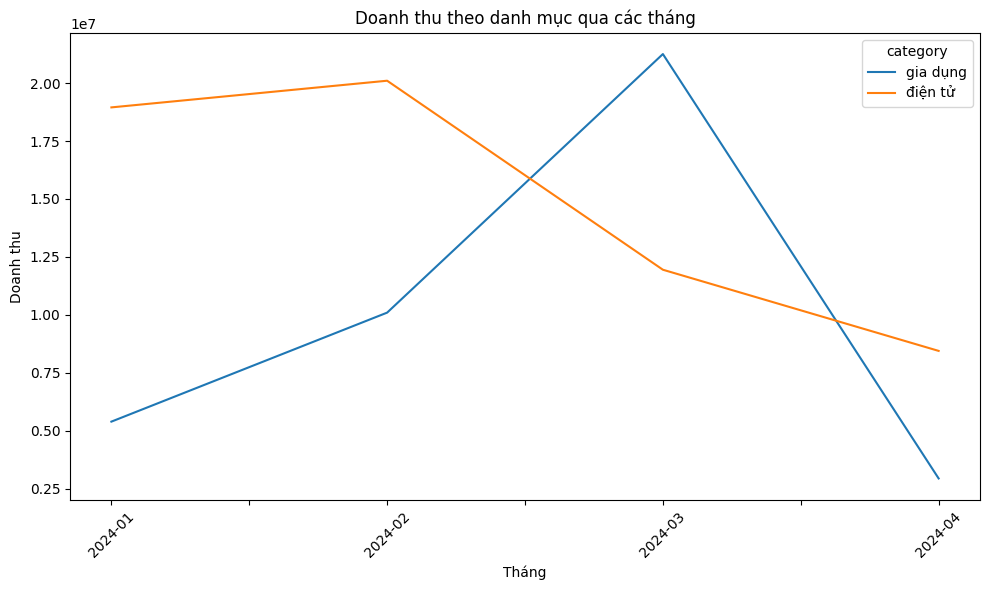

In [20]:
pivot_revenue = pd.pivot_table(
    df,
    values="revenue",
    index="category",
    columns="month",
    aggfunc="sum",
    fill_value=0
)

pivot_revenue.T.plot(figsize=(10,6))
plt.title("Doanh thu theo danh mục qua các tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.Pivot tỷ lệ trả hàng theo category × sản phẩm.

In [21]:
df["is_return"] = (df["return_merge"] == "both").astype(int)

pivot_return_rate = pd.pivot_table(
    df,
    values="is_return",
    index="category",
    columns="product_name",
    aggfunc="mean",
    fill_value=0
)

pivot_return_rate

product_name,ban phim co,chuot khong day,loa bluetooth,sac du phong,tai nghe bluetooth
category,,,,,
gia dụng,0.00,0.115385,0.000,0.233333,0.000000
điện tử,0.15,0.000000,0.125,0.000000,0.090909


Biểu đồ 2: Tỷ lệ trả hàng theo loại sản phẩm

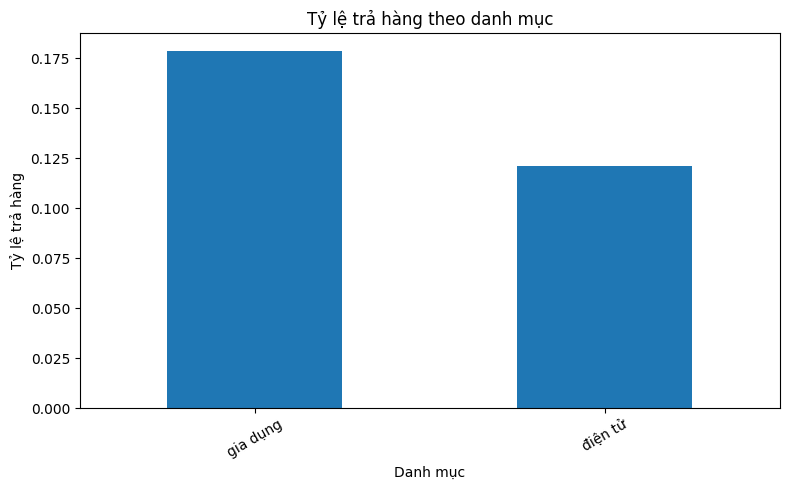

In [22]:
return_rate_by_category = df.groupby("category")["is_return"].mean()

return_rate_by_category.plot(
    kind="bar",
    figsize=(8,5)
)
plt.title("Tỷ lệ trả hàng theo danh mục")
plt.xlabel("Danh mục")
plt.ylabel("Tỷ lệ trả hàng")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3.Thực hiện stack/unstack bảng pivot.

In [23]:
revenue_stack = pivot_revenue.stack()
revenue_stack
revenue_unstack = revenue_stack.unstack()
revenue_unstack
return_stack = pivot_return_rate.stack()
return_stack

category  product_name      
gia dụng  ban phim co           0.000000
          chuot khong day       0.115385
          loa bluetooth         0.000000
          sac du phong          0.233333
          tai nghe bluetooth    0.000000
điện tử   ban phim co           0.150000
          chuot khong day       0.000000
          loa bluetooth         0.125000
          sac du phong          0.000000
          tai nghe bluetooth    0.090909
dtype: float64

# 4.Nhận xét danh mục có hiệu suất thấp nhất.

In [24]:
total_revenue_by_category = df.groupby("category")["revenue"].sum()
return_rate_by_category = df.groupby("category")["is_return"].mean()
summary = pd.DataFrame({
    "total_revenue": total_revenue_by_category,
    "return_rate": return_rate_by_category
}).sort_values(
    by=["total_revenue", "return_rate"],
    ascending=[True, False]
)
summary

,total_revenue,return_rate
category,,
gia dụng,39700000.0,0.178571
điện tử,59450000.0,0.121212


Biểu đồ 3: Hiệu suất danh mục (Doanh thu vs Trả hàng)

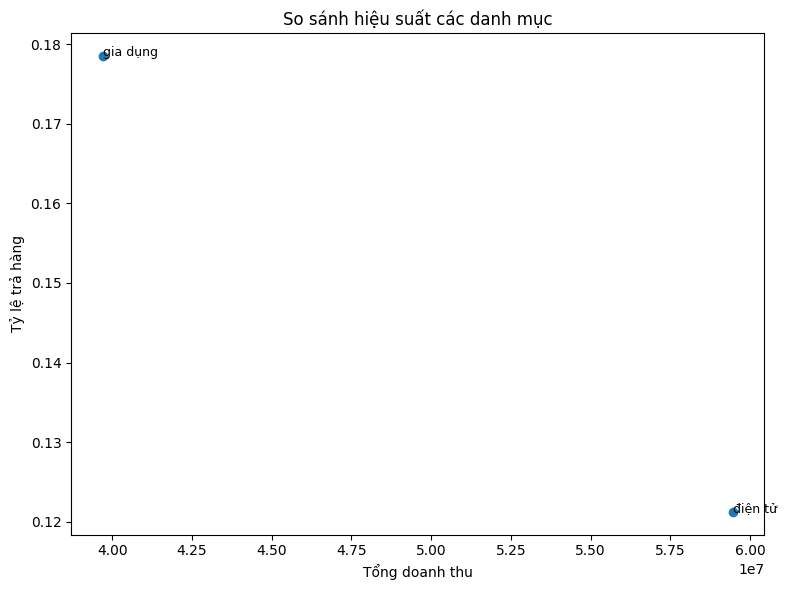

In [25]:
summary = df.groupby("category").agg(
    total_revenue=("revenue", "sum"),
    return_rate=("is_return", "mean")
)

plt.figure(figsize=(8,6))
plt.scatter(
    summary["total_revenue"],
    summary["return_rate"]
)

for cat in summary.index:
    plt.text(
        summary.loc[cat, "total_revenue"],
        summary.loc[cat, "return_rate"],
        cat,
        fontsize=9
    )

plt.xlabel("Tổng doanh thu")
plt.ylabel("Tỷ lệ trả hàng")
plt.title("So sánh hiệu suất các danh mục")
plt.tight_layout()
plt.show()
